In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Options to see all columns in a dataframe
pd.set_option('display.max_columns', None)


In [3]:
#Opening measuremement data as dataframe 
df = pd.read_csv(r'C:\Users\klaud\Desktop\Thesis\CMM\MEasurements almost all\CMM_data.csv')

#Selecting out features of interest
df = df[['K53 Order number',
         'K10096 Measurement number',
         'K1 Measured value',
         'Characteristic',
         'K4 Time/Date',
         'K2100 Target value' ]]

#Renaming columns
df = df.rename(columns={'K53 Order number': 'Machine_part',
                        'K10096 Measurement number': 'Measurement_nr',
                        'K2100 Target value': 'Target_value',
                        'K1 Measured value': 'Measured_value',
                        'K4 Time/Date': 'Date_time' })

In [4]:
#Creating new variable which represents the error value based on measured and targeted values
df['Error_value'] =  df['Measured_value'] -df['Target_value']

#Creating a column of generic names such as describe just Flatness, Roudness, and Diameter.
df['generic_characteristic'] = df['Characteristic']
df.loc[df['generic_characteristic'].str.startswith("Diameter"), 'generic_characteristic'] = "Diameter"
df.loc[df['generic_characteristic'].str.startswith("Coaxiality"), 'generic_characteristic'] = "Coaxiality"
df.loc[df['generic_characteristic'].str.startswith("Roundness"), 'generic_characteristic'] = "Roundness"
df.loc[df['generic_characteristic'].str.startswith("Flatness"), 'generic_characteristic'] = "Flatness"

#Creating columns which identify each machine without part identification
df['Machine'] = df['Machine_part']
df.loc[df['Machine'].str.startswith("Prusa"), 'Machine'] = "Prusa"
df.loc[df['Machine'].str.startswith("Ultimaker"), 'Machine'] = "Ultimaker"
df.loc[df['Machine'].str.startswith("Markforged"), 'Machine'] = "Markforged"

#Adding part number as a separate column and deleteing repeating variable "Machine_part"
df['Part'] = df['Machine_part'].apply(lambda x: x.split('_')[1])
#del df['Machine_part']

In [5]:
#Checking for missing values 
df.isna().any()

Machine_part              False
Measurement_nr            False
Measured_value            False
Characteristic            False
Date_time                 False
Target_value              False
Error_value               False
generic_characteristic    False
Machine                   False
Part                      False
dtype: bool

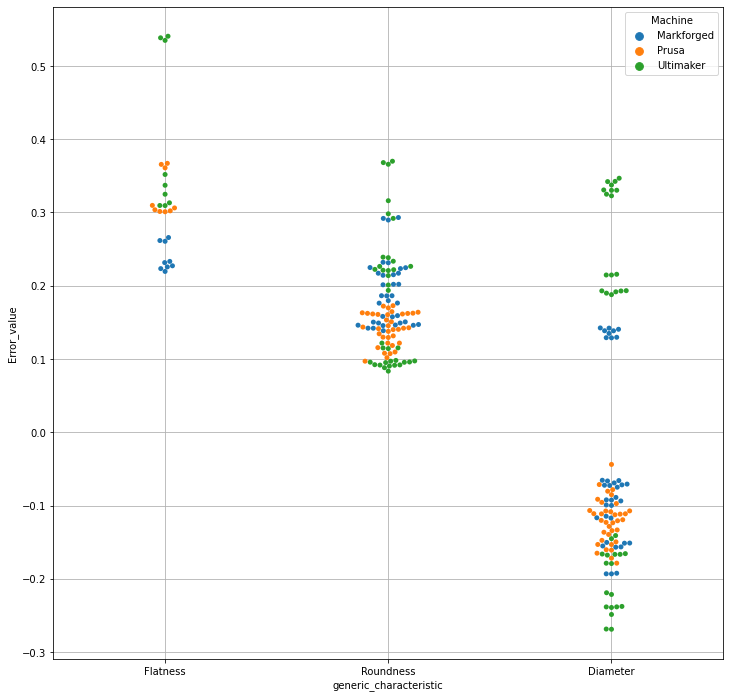

In [6]:
#Visualizing error values for each generic_characteristic for each machine

fig, ax = plt.subplots(1, figsize=(12, 12))
sns.swarmplot(data=df, x="generic_characteristic", y="Error_value", hue = 'Machine')

plt.grid(True)

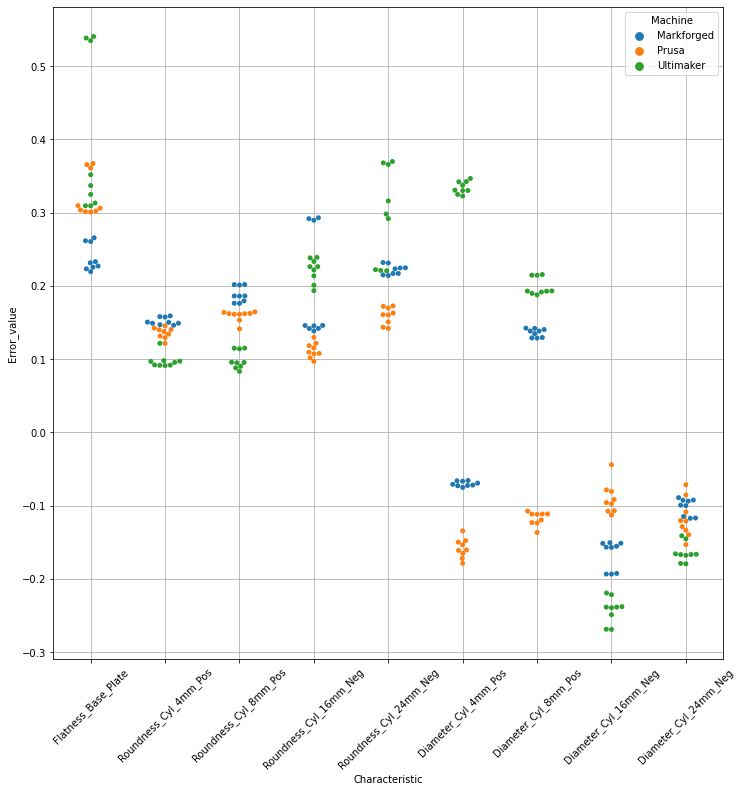

In [7]:
#Visualizing error values for each Characteristic 
fig, ax = plt.subplots(1, figsize=(12, 12))
sns.swarmplot(data=df, x="Characteristic", y="Error_value", hue = 'Machine')
plt.xticks(rotation = 45)
plt.grid(True)

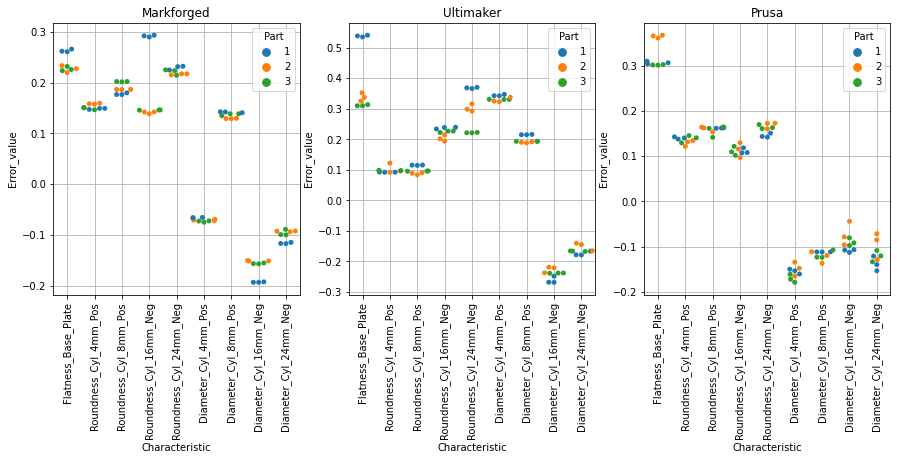

In [8]:
#Creating dataframes which separates machines
m = df[df['Machine'] == 'Markforged']
u = df[df['Machine'] == 'Ultimaker']
p = df[df['Machine'] == 'Prusa']

#Plotting each characteristics for each machine
fig = plt.figure(figsize = (15,5))

#Row, Column,plot number
#Coutplot
ax1 = plt.subplot(1,3,1)
plt.xticks(rotation = 'vertical')
ax1.title.set_text('Markforged')
sns.swarmplot(data=m, x="Characteristic", y="Error_value", hue ='Part')
plt.grid()



ax2 = plt.subplot(1,3,2)
plt.xticks(rotation = 'vertical')
ax2.title.set_text('Ultimaker')
sns.swarmplot(data=u, x="Characteristic", y="Error_value", hue ='Part')
plt.grid()

ax3 = plt.subplot(1,3,3)
ax3.title.set_text('Prusa')
plt.xticks(rotation = 'vertical')
sns.swarmplot(data=p, x="Characteristic", y="Error_value", hue ='Part')
plt.grid()

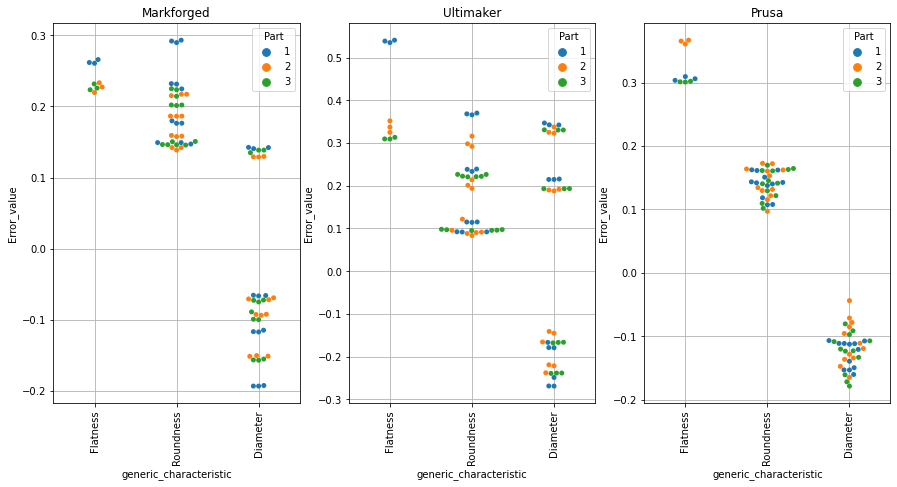

In [9]:
#Plotting each generic_characteristics for each part of machine
fig = plt.figure(figsize = (15,7))

#Row, Column,plot number
#Coutplot
ax1 = plt.subplot(1,3,1)
plt.xticks(rotation = 'vertical')
ax1.title.set_text('Markforged')
sns.swarmplot(data=m, x="generic_characteristic", y="Error_value", hue ='Part')
plt.grid()



ax2 = plt.subplot(1,3,2)
plt.xticks(rotation = 'vertical')
ax2.title.set_text('Ultimaker')
sns.swarmplot(data=u, x="generic_characteristic", y="Error_value", hue ='Part')
plt.grid()

ax3 = plt.subplot(1,3,3)
ax3.title.set_text('Prusa')
plt.xticks(rotation = 'vertical')
sns.swarmplot(data=p, x="generic_characteristic", y="Error_value", hue ='Part')

plt.grid()

In [ ]:
#Creating dataframes which separates machines
m = df[df['Machine'] == 'Markforged']
u = df[df['Machine'] == 'Ultimaker']
p = df[df['Machine'] == 'Prusa']

#Plotting each characteristics for each machine
fig = plt.figure(figsize = (15,5))

#Row, Column,plot number
#Coutplot
ax1 = plt.subplot(1,3,1)
plt.xticks(rotation = 'vertical')
ax1.title.set_text('Markforged')
sns.swarmplot(data=m, x="Characteristic", y="Error_value", hue ='Part')
plt.grid()



ax2 = plt.subplot(1,3,2)
plt.xticks(rotation = 'vertical')
ax2.title.set_text('Ultimaker')
sns.swarmplot(data=u, x="Characteristic", y="Error_value", hue ='Part')
plt.grid()

ax3 = plt.subplot(1,3,3)
ax3.title.set_text('Prusa')
plt.xticks(rotation = 'vertical')
sns.swarmplot(data=p, x="Characteristic", y="Error_value", hue ='Part')
plt.grid()

# Comparing measured errors for each part to printing data of each part 

In [13]:
#Ultimaker CMM measured errors statistical description
Parts = {'Ultimaker_1':[u['Error_value'][u['Part'] == '1'].mean(),
                  u['Error_value'][u['Part'] == '1'].min(),
                  u['Error_value'][u['Part'] == '1'].max(),
                  u['Error_value'][u['Part'] == '1'].std()],
        'Ultimaker_2':[u['Error_value'][u['Part'] == '2'].mean(),
                  u['Error_value'][u['Part'] == '2'].min(),
                  u['Error_value'][u['Part'] == '2'].max(),
                  u['Error_value'][u['Part'] == '2'].std()],
        'Ultimaker_3':[u['Error_value'][u['Part'] == '3'].mean(),
                  u['Error_value'][u['Part'] == '3'].min(),
                  u['Error_value'][u['Part'] == '3'].max(),
                  u['Error_value'][u['Part'] == '3'].std()],
        }

u_cmm = pd.DataFrame(Parts, columns = ['Ultimaker_1',
                                        'Ultimaker_2',
                                        'Ultimaker_3'], index=['Measured error (mm) mean',
                                                                    'Measured error (mm) min',
                                                                    'Measured error (mm) max',
                                                                    'Measured error (mm) std',])
#Option to change which shows only 3 decimals
pd.options.display.float_format = '{:,.3f}'.format
u_cmm

,Ultimaker_1,Ultimaker_2,Ultimaker_3
Measured error (mm) mean,0.164,0.131,0.119
Measured error (mm) min,-0.269,-0.238,-0.239
Measured error (mm) max,0.541,0.352,0.331
Measured error (mm) std,0.246,0.195,0.192


# Ultimaker printing data
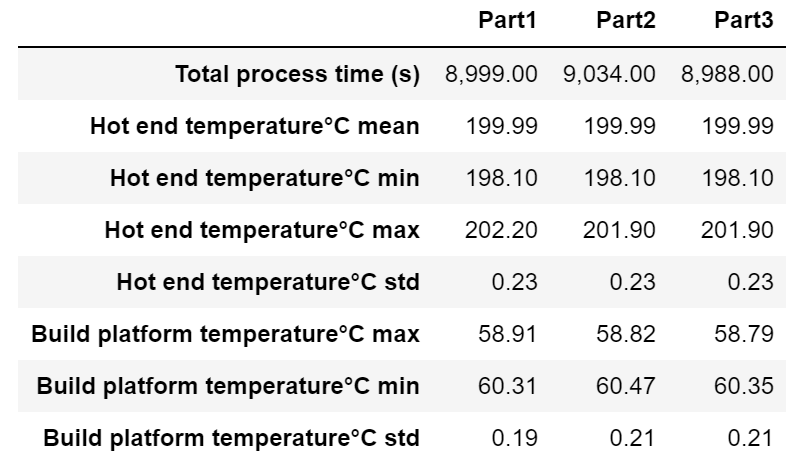

In [11]:
#Prusa CMM measured errors statistical description
Parts = {'Prusa_1':[p['Error_value'][p['Part'] == '1'].mean(),
                  p['Error_value'][p['Part'] == '1'].min(),
                  p['Error_value'][p['Part'] == '1'].max(),
                  p['Error_value'][p['Part'] == '1'].std()],
        'Prusa_2':[p['Error_value'][p['Part'] == '2'].mean(),
                  p['Error_value'][p['Part'] == '2'].min(),
                  p['Error_value'][p['Part'] == '2'].max(),
                  p['Error_value'][p['Part'] == '2'].std()],
        'Prusa_3':[p['Error_value'][p['Part'] == '3'].mean(),
                  p['Error_value'][p['Part'] == '3'].min(),
                  p['Error_value'][p['Part'] == '3'].max(),
                  p['Error_value'][p['Part'] == '3'].std()]
        }

p_cmm = pd.DataFrame(Parts, columns = ['Prusa_1',
                                        'Prusa_2',
                                        'Prusa_3'], index=['Measured error (mm) mean',
                                                                    'Measured error (mm) min',
                                                                    'Measured error (mm) max',
                                                                    'Measured error (mm) std',])
#Option to change which shows only 3 decimals
pd.options.display.float_format = '{:,.3f}'.format
p_cmm

,Prusa_1,Prusa_2,Prusa_3
Measured error (mm) mean,0.039,0.055,0.041
Measured error (mm) min,-0.160,-0.165,-0.179
Measured error (mm) max,0.310,0.367,0.302
Measured error (mm) std,0.162,0.167,0.161


# Prusa printing data 
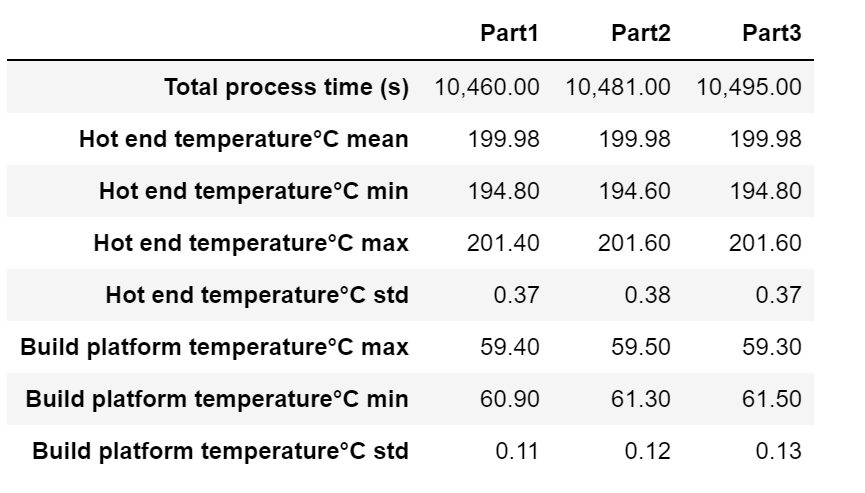

In [12]:
#Markforged CMM measured errors statistical description
Parts = {'Markforged_1':[m['Error_value'][m['Part'] == '1'].mean(),
                  m['Error_value'][m['Part'] == '1'].min(),
                  m['Error_value'][m['Part'] == '1'].max(),
                  m['Error_value'][m['Part'] == '1'].std()],
        'Markforged_2':[m['Error_value'][m['Part'] == '2'].mean(),
                  m['Error_value'][m['Part'] == '2'].min(),
                  m['Error_value'][m['Part'] == '2'].max(),
                  m['Error_value'][m['Part'] == '2'].std()],
        'Markforged_3':[m['Error_value'][m['Part'] == '3'].mean(),
                  m['Error_value'][m['Part'] == '3'].min(),
                  m['Error_value'][m['Part'] == '3'].max(),
                  m['Error_value'][m['Part'] == '3'].std()]
        }

m_cmm = pd.DataFrame(Parts, columns = ['Markforged_1',
                                        'Markforged_2',
                                        'Markforged_3'], index=['Measured error (mm) mean',
                                                                    'Measured error (mm) min',
                                                                    'Measured error (mm) max',
                                                                    'Measured error (mm) std',])
#Option to change which shows only 3 decimals
pd.options.display.float_format = '{:,.3f}'.format
m_cmm

,Markforged_1,Markforged_2,Markforged_3
Measured error (mm) mean,0.097,0.083,0.084
Measured error (mm) min,-0.193,-0.151,-0.157
Measured error (mm) max,0.293,0.233,0.232
Measured error (mm) std,0.170,0.140,0.144


# Markforged printing data
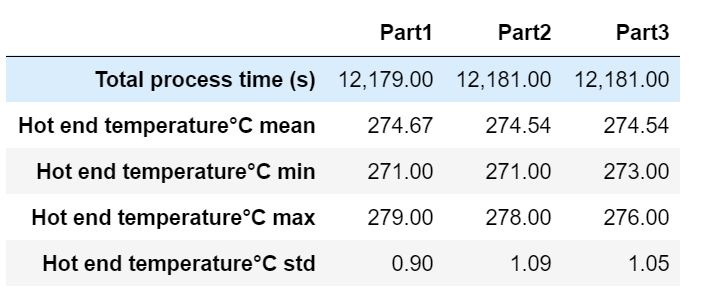